# There's Not Mush Room for this Title Considering its Height and Weight

## Abstract

This notebook utilizes two datasets to implement two Machine Learning algorithms using supervised learning: Linear Regression and Classification. One is of 500 People's Gender, Height, Weight, and Body Index. This set will be used to make a linear regression to predict body index given data of other features (height and weight). The second is of Mushroom Classifications which contains physical features of mushrooms (shape, surface, odor, habitat, etc.) and whether they are edible or poisonous. This set will be used to classify mushrooms as edible or poisonous given data of other features using a Support Vector Machine (SVM). I hope to find models which can predict well, but if they don't, I can learn from them.

## Section 1: Prepping the Regression datasets
**Requirements:**
+ At a high level, discuss what columns are included in the data
+ Load the dataset you've selected using pandas
+ Show the **head** of the data
+ For the columns you will be using in your regression, describe their setup in more detail
+ Clean the data if needed using pandas

The columns are Gender, Height, Weight, and Index. Gender is either Male or Female, Height is expressed in centimeters, weight is expressed in kilograms, and index is expressed from 0 to 5 to represent the categories "Extremely Weak", "Weak", "Normal", "Overweight", "Obesity", "Extreme Obesity".

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
from statistics import mean 
from string import ascii_lowercase
from sklearn.svm import SVC


#set seed for reproducibility
np.random.seed(12345)

In [80]:
# Use pandas to load your dataset and output the first 15 rows
dfGHWI = pd.read_csv('gender-height-weight-index.csv', header=0)
dfGHWI.head(n=15)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
5,Male,189,104,3
6,Male,147,92,5
7,Male,154,111,5
8,Male,174,90,3
9,Female,169,103,4


I chose to split data by genders, Male and Female.

In [3]:
# Male
dfMale = dfGHWI[dfGHWI['Gender'] == 'Male'] 
dfMale.head(n=15)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
4,Male,149,61,3
5,Male,189,104,3
6,Male,147,92,5
7,Male,154,111,5
8,Male,174,90,3
10,Male,195,81,2
13,Male,155,51,2
14,Male,191,79,2


In [4]:
# Female
dfFemale = dfGHWI[dfGHWI['Gender'] == 'Female'] 
dfFemale.head(n=15)

,Gender,Height,Weight,Index
2,Female,185,110,4
3,Female,195,104,3
9,Female,169,103,4
11,Female,159,80,4
12,Female,192,101,3
15,Female,153,107,5
16,Female,157,110,5
21,Female,153,149,5
22,Female,169,97,4
24,Female,172,67,2


## Section 2: Linear Regression

#### Male Set

In [59]:
# Use sklearn to split our dataset
X_m = dfMale[["Height","Weight"]]
Y_m = dfMale["Index"]
X_train_m, X_test_m, Y_train_m, Y_test_m = train_test_split(X_m, Y_m, test_size=0.33)

In [91]:
# Use sklearn to create and Linear Regressor and fit our data to it
model_m = LinearRegression()
model_m.fit(X_train_m, Y_train_m)
Y_pred_m = model_m.predict(X_test_m)

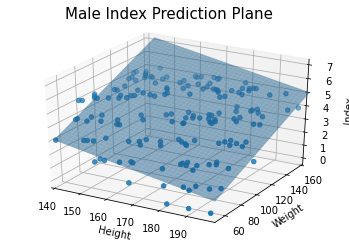

In [93]:
# Plot the male figure
fig_m = plt.figure()
plt.clf()
ax_m = fig_m.add_subplot(111, projection='3d')
ax_m.scatter(X_train_m['Height'], X_train_m['Weight'], Y_train_m)
fig_m.suptitle('Male Index Prediction Plane', fontsize=15, y=0.92)
ax_m.set_xlabel('Height')
ax_m.set_ylabel('Weight')
ax_m.set_zlabel('Index')
ax_m.set_xlim([dfMale['Height'].min(),dfMale['Height'].max()])
ax_m.set_ylim([dfMale['Weight'].min(),dfMale['Weight'].max()])

coefs_m = model_m.coef_
intercept_m = model_m.intercept_
xs_m = np.tile(np.arange(140,200,0.5), (120,1))
ys_m = np.tile(np.arange(50,170,1), (120,1)).T
zs_m = xs_m*coefs_m[0]+ys_m*coefs_m[1]+intercept_m
ax_m.plot_surface(xs_m,ys_m,zs_m, alpha=0.5)
plt.show()

In [95]:
# Error Rate
print("Root Mean Squared Error: %.4f" % np.sqrt(mean_squared_error(Y_test_m, Y_pred_m)))

Root Mean Squared Error: 0.6066


In [123]:
# k-fold cross validation (K=5)

Xm = X_m.iloc[:,:].values #not sure why but it acts up if I use df as is
Ym = Y_m.iloc[:].values

scores = []
kf = KFold(n_splits=5)
results = cross_val_score(model_m, Xm, Ym, cv=kf)
print(mean(results))

0.8243173444685712


#### Female Set

In [60]:
# Use sklearn to split our dataset
X_f = dfFemale[["Height","Weight"]]
Y_f = dfFemale["Index"]
X_train_f, X_test_f, Y_train_f, Y_test_f = train_test_split(X_f, Y_f, test_size=0.33)

In [61]:
# Use sklearn to create and Linear Regressor and fit our data to it
model_f = LinearRegression()
model_f.fit(X_train_f, Y_train_f)
Y_pred_f = model_f.predict(X_test_f)

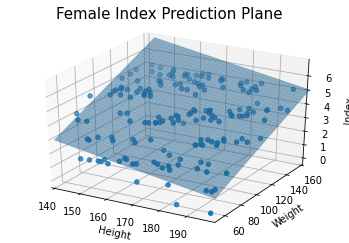

In [94]:
# Plot the female figure
fig_f = plt.figure()
plt.clf()
ax_f = fig_f.add_subplot(111, projection='3d')
ax_f.scatter(X_train_f['Height'], X_train_f['Weight'], Y_train_f)
fig_f.suptitle('Female Index Prediction Plane', fontsize=15, y=0.92)
ax_f.set_xlabel('Height')
ax_f.set_ylabel('Weight')
ax_f.set_zlabel('Index')
ax_f.set_xlim([dfFemale['Height'].min(),dfFemale['Height'].max()])
ax_f.set_ylim([dfFemale['Weight'].min(),dfFemale['Weight'].max()])

coefs_f = model_f.coef_
intercept_f = model_f.intercept_
xs_f = np.tile(np.arange(140,200,0.5), (120,1))
ys_f = np.tile(np.arange(50,170,1), (120,1)).T
zs_f = xs_f*coefs_f[0]+ys_f*coefs_f[1]+intercept_f
ax_f.plot_surface(xs_f,ys_f,zs_f, alpha=0.5)
plt.show()

In [86]:
# Error Rate
print(np.sqrt(mean_squared_error(Y_test_f, Y_pred_f)))

0.6341982435958335


In [119]:
# k-fold cross validation (K=5)

Xf = X_f.iloc[:,:].values #not sure why but it acts up if I use df as is
Yf = Y_f.iloc[:].values

scores = []
kf = KFold(n_splits=5)
results = cross_val_score(model_f, Xf, Yf, cv=kf)
print(mean(results))

0.8148850224573547


## Section 3: Prepping the classification dataset

In [ ]:
## Section 4: Classification with a Neural Network (or classifier of choice)
**Requirements:**
+ Split your cleaned dataset using sklearn into a training and test set
+ **(Situational)** Scale your data to prevent overfitting
+ Fit a classifier to your training set
+ **(Optional)** visualize the classifier on a data plot
+ Report on the error rate for your test set
+ Perform a k-fold cross validation on the dataset and report on the mean error rate (K >= 5)

In [67]:
# Use pandas to load your dataset and output the first 15 rows
dfMushrooms = pd.read_csv('mushrooms.csv', header=0)
dfMushrooms.head(n=15)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [78]:
# Use pandas to map categories to ints, summarize your mapping below
mapCharNum = {}
alphabet = list(ascii_lowercase)
for char in alphabet:
    mapCharNum[char] = ord(char)-96
mapCharNum['?'] = 0

dfMushroomsMapped = dfMushrooms.replace(mapCharNum)

I mapped the characters 'a'-'z':1-26 and '?':0

In [79]:
dfMushroomsMapped.head(n=15)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,16,24,19,14,20,16,6,3,14,11,...,19,23,23,16,23,15,16,11,19,21
1,5,24,19,25,20,1,6,3,2,11,...,19,23,23,16,23,15,16,14,14,7
2,5,2,19,23,20,12,6,3,2,14,...,19,23,23,16,23,15,16,14,14,13
3,16,24,25,23,20,16,6,3,14,14,...,19,23,23,16,23,15,16,11,19,21
4,5,24,19,7,6,14,6,23,2,11,...,19,23,23,16,23,15,5,14,1,7
5,5,24,25,25,20,1,6,3,2,14,...,19,23,23,16,23,15,16,11,14,7
6,5,2,19,23,20,1,6,3,2,7,...,19,23,23,16,23,15,16,11,14,13
7,5,2,25,23,20,12,6,3,2,14,...,19,23,23,16,23,15,16,14,19,13
8,16,24,25,23,20,16,6,3,14,16,...,19,23,23,16,23,15,16,11,22,7
9,5,2,19,25,20,1,6,3,2,7,...,19,23,23,16,23,15,16,11,19,13


In [104]:
# Use sklearn to split our dataset
X_mush = dfMushroomsMapped[["cap-shape","cap-surface", "cap-color", "bruises", "odor", "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat"]]
Y_mush = dfMushroomsMapped["class"]

In [125]:
# Use sklearn to split our dataset
Xmush_train, Xmush_test, Ymush_train, Ymush_test = train_test_split(X_mush, Y_mush, test_size=0.33)

In [126]:
# Initialize a MLP Classifier with your choice of parameters
Xmush = X_mush.iloc[:,:].values #not sure why but it acts up if I use df as is
Ymush = Y_mush.iloc[:].values

model_mush = SVC()
model_mush.fit(Xmush, Ymush)
Ymush_pred = model_mush.predict(Xmush_test)

In [127]:
# Report on the accuracy of the Test set for your classifier
# Error Rate
print("Root Mean Squared Error: %.4f" % np.sqrt(mean_squared_error(Ymush_test, Ymush_pred)))

Root Mean Squared Error: 0.6009


In [128]:
# Perform K-fold cross validation on your dataset
kf = KFold(n_splits=5)
results = cross_val_score(model_mush, Xmush, Ymush, cv=kf)
print(mean(results))

0.9231944676013641


## Conclusions

It seems like both error rates were extremely high, so a linear regression for body index prediction and a standard SVM to predict mushroom edibleness did not make for good models. I found it interesting that the models were very off. A linear regression was simple to start with for body index. It may be better to see if there are outliers, or it could just be that those two features are not enough to predict body index. I thought using an SVM for the mushroom classification would be good considering it would be similar to a spam filter where a mushroom is classified as edible or poisonous, but I suppose there are too many features involved which create overlaps. I don't know how cleanly a line divides the data, which might mean I either have to project it to a higher dimension first, or use a different method.